## Final Project Submission

Please fill out:
* Student name:SAMUEL GICHURU MUGAISI
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: ASHADEEN
* Blog post URL:


# Your code here - remember to use markdown cells for comments as well


In [182]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import csv
import sqlite3
import scipy

%matplotlib inline

# DATA CLEANING 

First we load bom.movie_gross.csv into a dataframe to inspect it's
contents first then we can clean it up by removing missing values 
then we understand our data and how they are related.

In [126]:

df1=pd.read_csv("bom.movie_gross.csv")
df1
    

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [127]:
df1.shape

(3387, 5)

In [128]:
df1.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

we check the data types in each column 
since we want both foreign_gross and domestic_gross to be of the same data type 
we shall eventually convert the foreign_gross to a float after we drop null values .

In [129]:
df1.dropna(inplace=True)
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [130]:
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '').astype(float)
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [131]:
df1.describe()

,domestic_gross,foreign_gross,year
count,2.007000e+03,2.007000e+03,2007.000000
mean,4.701984e+07,7.579038e+07,2013.506228
std,8.162689e+07,1.381796e+08,2.597997
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.700000e+05,3.900000e+06,2011.000000
50%,1.670000e+07,1.940000e+07,2013.000000
75%,5.605000e+07,7.595000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


Rename the the title colum to movie 

In [132]:
df1.rename(columns={'title': 'movie'}, inplace=True)
df1

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [133]:
# check for duplicated values 
df1.loc[df1.duplicated()]

,movie,studio,domestic_gross,foreign_gross,year


We are done cleaning bom.movie_gross data set

DATA SET 2 tn.movie_budgets
we load tn.movie_budgets into a dataframe to inspect it's
contents first then we can clean it up by removing missing values 
then we understand our data and how they are related.

In [134]:
df2=pd.read_csv("tn.movie_budgets.csv")
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [135]:
df2.shape

(5782, 6)

In [136]:
df2.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

we are going to change the data types for production_budget,domestic_gross,worldwide_gross to floats and the release date to an integer


In [137]:
df2['production_budget'] = df2['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df2['domestic_gross'] = df2['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df2['worldwide_gross'] = df2['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
df2['release_date'] = pd.to_datetime(df2['release_date']).dt.year.astype(int)


df2.dtypes

id                     int64
release_date           int32
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [138]:
df2.dropna(inplace=True)
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999,Following,6000.0,48482.0,2.404950e+05
5779,80,2005,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [139]:
df2.describe()

,id,release_date,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,2003.967139,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,12.724386,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1915.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,2000.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,2007.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,2012.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,2020.000000,4.250000e+08,9.366622e+08,2.776345e+09


We drop the Id column we also change the release_date column to year

In [140]:
df2.drop(['id'],axis=1)


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
5777,2018,Red 11,7000.0,0.0,0.000000e+00
5778,1999,Following,6000.0,48482.0,2.404950e+05
5779,2005,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,2015,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [141]:
df2.rename(columns={'release_date': 'year'}, inplace=True)


In [142]:
df2

,id,year,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999,Following,6000.0,48482.0,2.404950e+05
5779,80,2005,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015,A Plague So Pleasant,1400.0,0.0,0.000000e+00


Join the two dataframes we will be working with df1 and df2 with the specific columns we are interested in 
columns secluded for df1 ='movie', 'studio', 'domestic_gross', 'foreign_gross'
columns secluded for df1='year', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'

In [143]:
# # Selecting specific columns from df1
df1_selected = df1[['movie', 'studio', 'domestic_gross', 'foreign_gross']]

# Selecting specific columns from df2
df2_selected = df2[['year', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']]

# # Merging the two DataFrames on the common column 'movie'
movies_df = pd.merge(df1_selected, df2_selected, on='movie', how='inner')

# # Displaying the merged DataFrame
movies_df

,movie,studio,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...
1078,Hotel Artemis,Global Road,6700000.0,6000000.0,2018,15000000.0,6708137.0,1.275880e+07
1079,Kin,LGF,5700000.0,4300000.0,2018,30000000.0,5718096.0,1.009682e+07
1080,Suspiria,Amazon,2500000.0,5400000.0,2018,20000000.0,2483472.0,7.034615e+06
1081,Destroyer,Annapurna,1500000.0,4000000.0,2018,9000000.0,1533324.0,3.681096e+06


In [144]:
movies_df.dropna(inplace=True)
movies_df


,movie,studio,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...
1078,Hotel Artemis,Global Road,6700000.0,6000000.0,2018,15000000.0,6708137.0,1.275880e+07
1079,Kin,LGF,5700000.0,4300000.0,2018,30000000.0,5718096.0,1.009682e+07
1080,Suspiria,Amazon,2500000.0,5400000.0,2018,20000000.0,2483472.0,7.034615e+06
1081,Destroyer,Annapurna,1500000.0,4000000.0,2018,9000000.0,1533324.0,3.681096e+06


In [145]:
movies_df.dropna(inplace=True)




    We import and work on the im.db using SQL

In [146]:
import sqlite3
conn = sqlite3.connect('im.db')
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect('im.db')

# Create a cursor object
cursor = conn.cursor()

# Retrieve a list of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Iterate over the tables and display their schema
for table in tables:
    table_name = table[0]
    print(f"Table Name: {table_name}")
    cursor.execute(f"PRAGMA table_info({table_name})")
    columns = cursor.fetchall()
    print("Columns:")
    for column in columns:
        print(column)
    print()

# Close the cursor and database connection
cursor.close()
conn.close()


Table Name: movie_basics
Columns:
(0, 'movie_id', 'TEXT', 0, None, 0)
(1, 'primary_title', 'TEXT', 0, None, 0)
(2, 'original_title', 'TEXT', 0, None, 0)
(3, 'start_year', 'INTEGER', 0, None, 0)
(4, 'runtime_minutes', 'REAL', 0, None, 0)
(5, 'genres', 'TEXT', 0, None, 0)

Table Name: directors
Columns:
(0, 'movie_id', 'TEXT', 0, None, 0)
(1, 'person_id', 'TEXT', 0, None, 0)

Table Name: known_for
Columns:
(0, 'person_id', 'TEXT', 0, None, 0)
(1, 'movie_id', 'TEXT', 0, None, 0)

Table Name: movie_akas
Columns:
(0, 'movie_id', 'TEXT', 0, None, 0)
(1, 'ordering', 'INTEGER', 0, None, 0)
(2, 'title', 'TEXT', 0, None, 0)
(3, 'region', 'TEXT', 0, None, 0)
(4, 'language', 'TEXT', 0, None, 0)
(5, 'types', 'TEXT', 0, None, 0)
(6, 'attributes', 'TEXT', 0, None, 0)
(7, 'is_original_title', 'REAL', 0, None, 0)

Table Name: movie_ratings
Columns:
(0, 'movie_id', 'TEXT', 0, None, 0)
(1, 'averagerating', 'REAL', 0, None, 0)
(2, 'numvotes', 'INTEGER', 0, None, 0)

Table Name: persons
Columns:
(0, 'perso

In [147]:
conn = sqlite3.connect('im.db')
sql_query = "SELECT * FROM persons "
df4 = pd.read_sql(sql_query, conn)
df4


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [148]:
sql_query1 = """SELECT primary_profession,primary_name,person_id 
                 FROM persons 
                 WHERE primary_profession LIKE'%director%' """
df5 = pd.read_sql(sql_query1, conn)
df5


,primary_profession,primary_name,person_id
0,"director,production_manager,miscellaneous",Ruel S. Bayani,nm0062879
1,"director,producer,writer",Bryan Beasley,nm0064023
2,"actor,writer,director",Arnaud Bedouët,nm0066163
3,"editorial_department,director,editor",Steve Mitchell Beebe,nm0066268
4,"director,actor,producer",Dylan Bell,nm0068170
...,...,...,...
146028,director,Zheng Wei,nm9971456
146029,"actor,cinematographer,assistant_director",Zach Campbell,nm9978371
146030,"director,writer",Rama Narayanan,nm9980896
146031,"director,writer,cinematographer",Samir Eshra,nm9981679


In [149]:
sql_query2 = "SELECT * FROM directors "
df6= pd.read_sql(sql_query2, conn)
df6

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [150]:
sql_query3 = "SELECT * FROM movie_basics "
df7= pd.read_sql(sql_query3, conn)
df7

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Jion the directors table,movie_basics table and persons table

In [151]:
sql_query4="""SELECT mb.movie_id, 
              mb.original_title AS movie, 
              mb.start_year AS release_date, 
              mb.genres,runtime_minutes,
              d.person_id, 
              p.primary_name
              FROM movie_basics mb
              JOIN Directors d USING (movie_id)
              JOIN Persons p USING (person_id);


"""
movies_df2= pd.read_sql(sql_query4, conn)
movies_df2

,movie_id,movie,release_date,genres,runtime_minutes,person_id,primary_name
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",175.0,nm0712540,Harnam Singh Rawail
1,tt0063540,Sunghursh,2013,"Action,Crime,Drama",175.0,nm0712540,Harnam Singh Rawail
2,tt0063540,Sunghursh,2013,"Action,Crime,Drama",175.0,nm0712540,Harnam Singh Rawail
3,tt0063540,Sunghursh,2013,"Action,Crime,Drama",175.0,nm0712540,Harnam Singh Rawail
4,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama",114.0,nm0002411,Mani Kaul
...,...,...,...,...,...,...,...
291166,tt9916730,6 Gunn,2017,None,116.0,nm10538612,Kiran Gawade
291167,tt9916754,Chico Albuquerque - Revelações,2013,Documentary,NaN,nm8349149,Vinicius Augusto Bozzo
291168,tt9916754,Chico Albuquerque - Revelações,2013,Documentary,NaN,nm8349149,Vinicius Augusto Bozzo
291169,tt9916754,Chico Albuquerque - Revelações,2013,Documentary,NaN,nm9272490,Angela Gurgel


In [152]:
movies_df2= movies_df2.drop(columns=['movie_id', 'person_id'])
movies_df2

,movie,release_date,genres,runtime_minutes,primary_name
0,Sunghursh,2013,"Action,Crime,Drama",175.0,Harnam Singh Rawail
1,Sunghursh,2013,"Action,Crime,Drama",175.0,Harnam Singh Rawail
2,Sunghursh,2013,"Action,Crime,Drama",175.0,Harnam Singh Rawail
3,Sunghursh,2013,"Action,Crime,Drama",175.0,Harnam Singh Rawail
4,Ashad Ka Ek Din,2019,"Biography,Drama",114.0,Mani Kaul
...,...,...,...,...,...
291166,6 Gunn,2017,None,116.0,Kiran Gawade
291167,Chico Albuquerque - Revelações,2013,Documentary,NaN,Vinicius Augusto Bozzo
291168,Chico Albuquerque - Revelações,2013,Documentary,NaN,Vinicius Augusto Bozzo
291169,Chico Albuquerque - Revelações,2013,Documentary,NaN,Angela Gurgel


We analyse the cleaned data 

In [153]:
movies_df

,movie,studio,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...
1078,Hotel Artemis,Global Road,6700000.0,6000000.0,2018,15000000.0,6708137.0,1.275880e+07
1079,Kin,LGF,5700000.0,4300000.0,2018,30000000.0,5718096.0,1.009682e+07
1080,Suspiria,Amazon,2500000.0,5400000.0,2018,20000000.0,2483472.0,7.034615e+06
1081,Destroyer,Annapurna,1500000.0,4000000.0,2018,9000000.0,1533324.0,3.681096e+06


In [154]:
movies_df2


,movie,release_date,genres,runtime_minutes,primary_name
0,Sunghursh,2013,"Action,Crime,Drama",175.0,Harnam Singh Rawail
1,Sunghursh,2013,"Action,Crime,Drama",175.0,Harnam Singh Rawail
2,Sunghursh,2013,"Action,Crime,Drama",175.0,Harnam Singh Rawail
3,Sunghursh,2013,"Action,Crime,Drama",175.0,Harnam Singh Rawail
4,Ashad Ka Ek Din,2019,"Biography,Drama",114.0,Mani Kaul
...,...,...,...,...,...
291166,6 Gunn,2017,None,116.0,Kiran Gawade
291167,Chico Albuquerque - Revelações,2013,Documentary,NaN,Vinicius Augusto Bozzo
291168,Chico Albuquerque - Revelações,2013,Documentary,NaN,Vinicius Augusto Bozzo
291169,Chico Albuquerque - Revelações,2013,Documentary,NaN,Angela Gurgel


Join movies_df2 and movies_df to create one table for analysis 

In [155]:
# Selecting specific columns from movies_df
movies_df_selected = movies_df[['movie', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'production_budget', 'domestic_gross_y', 'worldwide_gross']]

# Selecting specific columns from movies_df2
movies_df2_selected = movies_df2[['movie', 'genres', 'primary_name','runtime_minutes']]

# Merging the two DataFrames on the common column 'movie'
movies_select = pd.merge(movies_df_selected, movies_df2_selected, on='movie', how='inner')

# Displaying the merged DataFrame
movies_select


,movie,studio,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross_y,worldwide_gross,genres,primary_name,runtime_minutes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"Adventure,Animation,Comedy",Lee Unkrich,103.0
1,Toy Story 3,BV,415000000.0,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"Adventure,Animation,Comedy",Lee Unkrich,103.0
2,Toy Story 3,BV,415000000.0,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"Adventure,Animation,Comedy",Lee Unkrich,103.0
3,Toy Story 3,BV,415000000.0,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"Adventure,Animation,Comedy",Lee Unkrich,103.0
4,Inception,WB,292600000.0,535700000.0,2010,160000000.0,292576195.0,8.355246e+08,"Action,Adventure,Sci-Fi",Christopher Nolan,148.0
...,...,...,...,...,...,...,...,...,...,...,...
3815,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,30000000.0,490973.0,6.485990e+05,"Action,Adventure,Animation",Khurram H. Alavi,105.0
3816,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,30000000.0,490973.0,6.485990e+05,"Action,Adventure,Animation",Khurram H. Alavi,105.0
3817,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,30000000.0,490973.0,6.485990e+05,"Action,Adventure,Animation",Khurram H. Alavi,105.0
3818,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,30000000.0,490973.0,6.485990e+05,"Action,Adventure,Animation",Khurram H. Alavi,105.0


In [156]:
\
# Dropping duplicates based on the 'movie' column
movies_select = movies_select.drop_duplicates(subset=['movie'])

# Displaying the DataFrame after dropping duplicates
movies_select


,movie,studio,domestic_gross_x,foreign_gross,year,production_budget,domestic_gross_y,worldwide_gross,genres,primary_name,runtime_minutes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,200000000.0,415004880.0,1.068880e+09,"Adventure,Animation,Comedy",Lee Unkrich,103.0
4,Inception,WB,292600000.0,535700000.0,2010,160000000.0,292576195.0,8.355246e+08,"Action,Adventure,Sci-Fi",Christopher Nolan,148.0
5,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,165000000.0,238736787.0,7.562447e+08,"Adventure,Animation,Comedy",Mike Mitchell,93.0
15,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,68000000.0,300531751.0,7.061028e+08,"Adventure,Drama,Fantasy",David Slade,124.0
17,Iron Man 2,Par.,312400000.0,311500000.0,2010,170000000.0,312433331.0,6.211564e+08,"Action,Adventure,Sci-Fi",Jon Favreau,124.0
...,...,...,...,...,...,...,...,...,...,...,...
3796,Hotel Artemis,Global Road,6700000.0,6000000.0,2018,15000000.0,6708137.0,1.275880e+07,"Action,Drama,Sci-Fi",Drew Pearce,94.0
3797,Kin,LGF,5700000.0,4300000.0,2018,30000000.0,5718096.0,1.009682e+07,"Drama,Music",Rachel Lambert,45.0
3805,Suspiria,Amazon,2500000.0,5400000.0,2018,20000000.0,2483472.0,7.034615e+06,"Fantasy,Horror,Mystery",Luca Guadagnino,152.0
3808,Destroyer,Annapurna,1500000.0,4000000.0,2018,9000000.0,1533324.0,3.681096e+06,"Action,Crime,Drama",Karyn Kusama,121.0


# EDA &VISUALIZATION

problem statement production budget one to check whether production budgets influence movie gross
Check which genres generated the most income across domestic and worldwide 
check which studio invested in the production budget and were there any returns


check which year,movie had the highest production budget 

In [169]:
max_budget_year =movies_select.groupby('year')['production_budget'].max()
year_highest_budget = max_budget_year.idxmax()
year_highest_budget

2011

In [170]:
index_highest_budget = movies_select['production_budget'].idxmax()
movie_highest_budget = movies_select.loc[index_highest_budget]
movie_highest_budget

movie                Pirates of the Caribbean: On Stranger Tides
studio                                                        BV
domestic_gross_x                                     241100000.0
foreign_gross                                        804600000.0
year                                                        2011
production_budget                                    410600000.0
domestic_gross_y                                     241063875.0
worldwide_gross                                     1045663875.0
genres                                  Action,Adventure,Fantasy
primary_name                                        Rob Marshall
runtime_minutes                                            136.0
total_gross                                         1286763875.0
Name: 520, dtype: object

In [171]:
index_highest_domestic_gross = movies_select['domestic_gross_x'].idxmax()
movie_highest_domestic_gross = movies_select.loc[index_highest_domestic_gross]
movie_highest_domestic_gross

movie                          Black Panther
studio                                    BV
domestic_gross_x                 700100000.0
foreign_gross                    646900000.0
year                                    2018
production_budget                200000000.0
domestic_gross_y                 700059566.0
worldwide_gross                 1348258224.0
genres               Action,Adventure,Sci-Fi
primary_name                    Ryan Coogler
runtime_minutes                        134.0
total_gross                     2048358224.0
Name: 3516, dtype: object

In [ ]:
index_highest_worldwide_gross = movies_select['worldwide_gross'].idxmax()
movie_highest_worldwide_gross = movies_select.loc[index_highest_worldwide_gross]
movie_highest_worldwide_gross

In [ ]:
# Sorting the DataFrame based on the 'production_budget' column in descending order
top10_budget_movies_df = movies_select.sort_values(by='production_budget', ascending=False).head(10)
top10_budget_movies_df 

# Extracting the movie names and their budgets
top10_budget_movies = top10_budget_movies_df[['movie', 'production_budget']]

# Converting the DataFrame to a list of tuples for easy reading (optional)
top10_budget_movies_list = list(top10_budget_movies.itertuples(index=False, name=None))
top10_budget_movies_list



In [162]:
# Compute the average production budget
average_production_budget = movies_select['production_budget'].mean()
highest_production_budget = movies_select['production_budget'].max()

highest_domestic_gross = movies_select['domestic_gross_x'].max()
highest_worldwide_gross = movies_select['worldwide_gross'].max()

# Find the highest total gross (combining domestic and worldwide gross)
movies_select['total_gross'] = movies_select['domestic_gross_x'] + movies_select['worldwide_gross']
highest_total_gross = movies_select['total_gross'].max()

average_domestic_gross = movies_select['domestic_gross_x'].mean()

# Calculate the average worldwide gross
average_worldwide_gross = movies_select['worldwide_gross'].mean()




print("Highest Production Budget:", highest_production_budget)
print("Average Production Budget:", average_production_budget)
print("Highest Domestic Gross:", highest_domestic_gross)
print("Highest Worldwide Gross:", highest_worldwide_gross)
print("Highest Total Gross:", highest_total_gross)
print("Average Domestic Gross:", average_domestic_gross)
print("Average Worldwide Gross:", average_worldwide_gross)

Highest Production Budget: 410600000.0
Average Production Budget: 54201470.0
Highest Domestic Gross: 700100000.0
Highest Worldwide Gross: 2048134200.0
Highest Total Gross: 2726934200.0
Average Domestic Gross: 70704068.2321608
Average Worldwide Gross: 178978565.76884422


C:\Users\User\AppData\Local\Temp\ipykernel_20684\2683603061.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_select['total_gross'] = movies_select['domestic_gross_x'] + movies_select['worldwide_gross']


Visualization 
-Top movies with highest production budget,highest domestic gross,


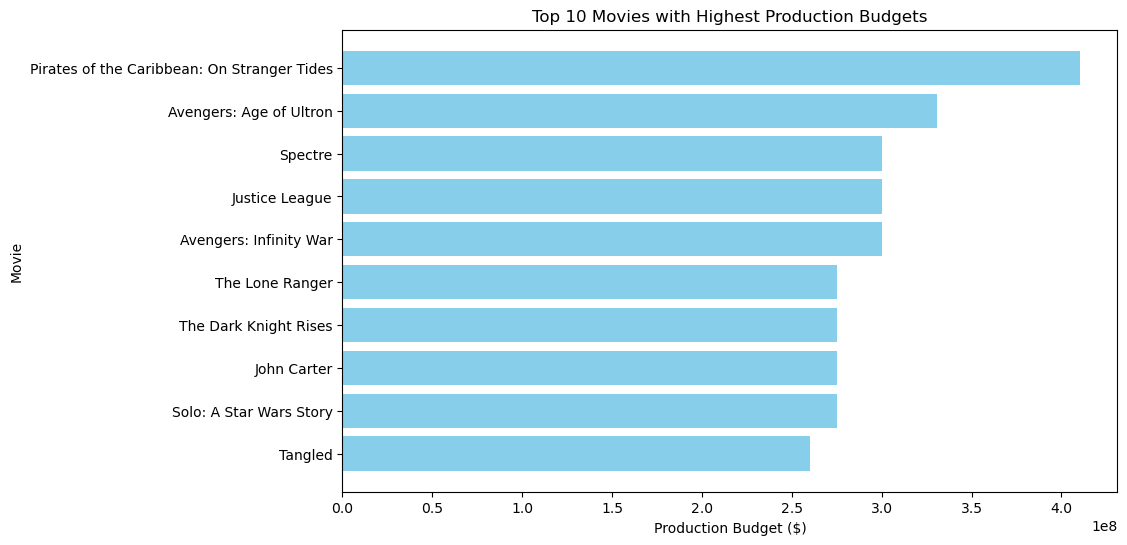

In [172]:
# Assuming top10_budget_movies_df is your DataFrame

# Extracting movie names and production budgets
movies = top10_budget_movies_df['movie']
budgets = top10_budget_movies_df['production_budget']

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.barh(movies, budgets, color='skyblue')
plt.xlabel('Production Budget ($)')
plt.ylabel('Movie')
plt.title('Top 10 Movies with Highest Production Budgets')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest budget movie on top
plt.show()


In [164]:

# Sorting the DataFrame based on the 'domestic_gross_x' column in descending order
top10_domestic_gross_movies_df = movies_select.sort_values(by='domestic_gross_x', ascending=False).head(10)

# Extracting the movie names and their domestic gross
top10_domestic_gross_movies = top10_domestic_gross_movies_df[['movie', 'domestic_gross_x']]

# Converting the DataFrame to a list of tuples for easy reading (optional)
top10_domestic_gross_movies_list = list(top10_domestic_gross_movies.itertuples(index=False, name=None))

# Printing the list of top 10 movies with the highest domestic gross
for movie, gross in top10_domestic_gross_movies_list:
    print(f"Movie: {movie}, Domestic Gross: {gross}")


Movie: Black Panther, Domestic Gross: 700100000.0
Movie: Avengers: Infinity War, Domestic Gross: 678800000.0
Movie: Jurassic World, Domestic Gross: 652300000.0
Movie: Incredibles 2, Domestic Gross: 608600000.0
Movie: Finding Dory, Domestic Gross: 486300000.0
Movie: Avengers: Age of Ultron, Domestic Gross: 459000000.0
Movie: The Dark Knight Rises, Domestic Gross: 448100000.0
Movie: The Hunger Games: Catching Fire, Domestic Gross: 424700000.0
Movie: Jurassic World: Fallen Kingdom, Domestic Gross: 417700000.0
Movie: Toy Story 3, Domestic Gross: 415000000.0


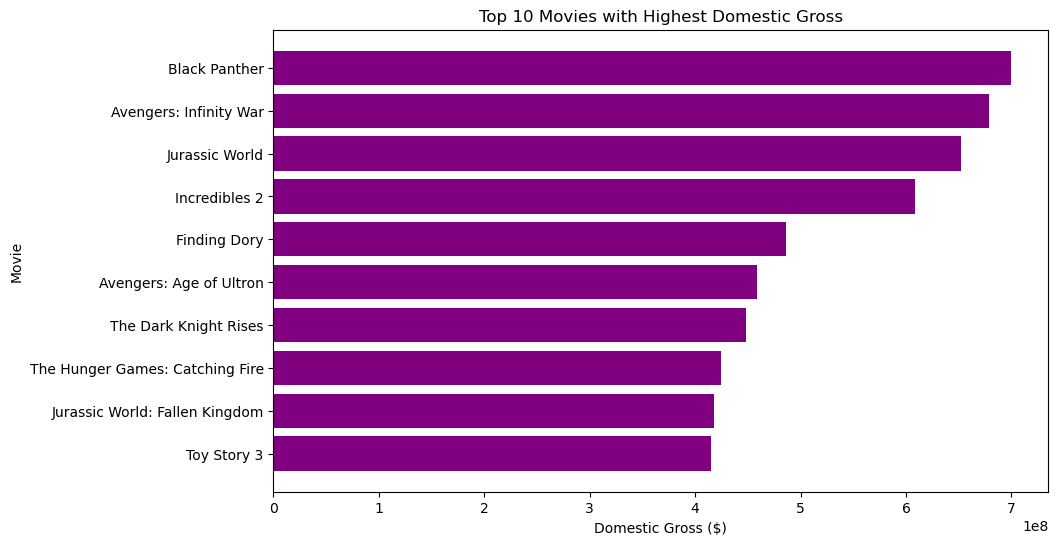

In [173]:

# Extracting movie names and domestic gross
movies = top10_domestic_gross_movies_df['movie']
domestic_gross = top10_domestic_gross_movies_df['domestic_gross_x']

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.barh(movies, domestic_gross, color='purple')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Movie')
plt.title('Top 10 Movies with Highest Domestic Gross')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest grossing movie on top
plt.show()


In [174]:
# Sorting the DataFrame based on the 'foreign_gross' column in descending order
top10_foreign_gross_movies_df = movies_select.sort_values(by='worldwide_gross', ascending=False).head(10)

# Extracting the movie names and their foreign gross
top10_foreign_gross_movies = top10_foreign_gross_movies_df[['movie', 'worldwide_gross']]

# Converting the DataFrame to a list of tuples for easy reading (optional)
top10_foreign_gross_movies_list = list(top10_foreign_gross_movies.itertuples(index=False, name=None))

# Printing the list of top 10 movies with the highest foreign gross
for movie, gross in top10_foreign_gross_movies_list:
    print(f"Movie: {movie}, worldwide_gross: {gross}")


Movie: Avengers: Infinity War, worldwide_gross: 2048134200.0
Movie: Jurassic World, worldwide_gross: 1648854864.0
Movie: Avengers: Age of Ultron, worldwide_gross: 1403013963.0
Movie: Black Panther, worldwide_gross: 1348258224.0
Movie: Jurassic World: Fallen Kingdom, worldwide_gross: 1305772799.0
Movie: Frozen, worldwide_gross: 1272469910.0
Movie: Incredibles 2, worldwide_gross: 1242520711.0
Movie: The Fate of the Furious, worldwide_gross: 1234846267.0
Movie: Minions, worldwide_gross: 1160336173.0
Movie: Aquaman, worldwide_gross: 1146894640.0


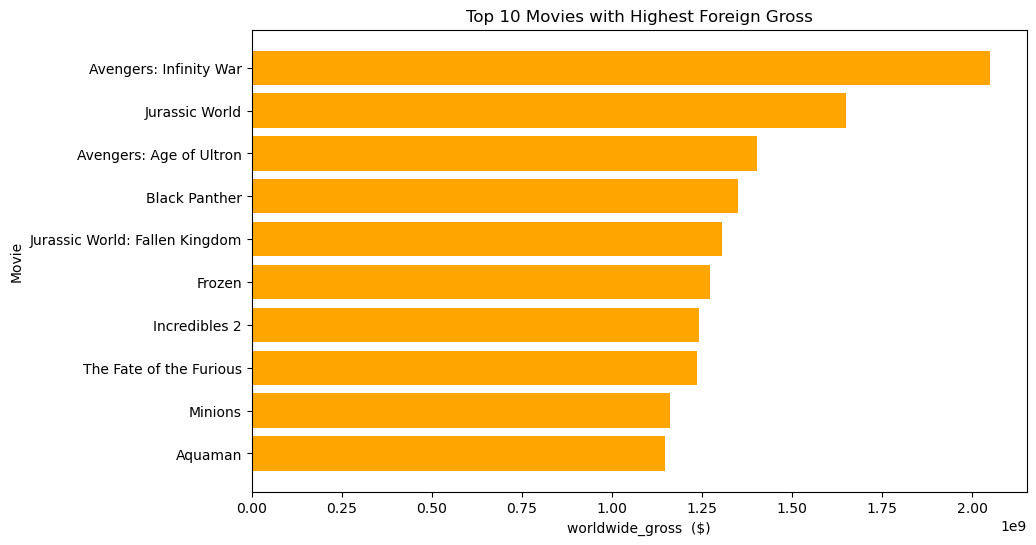

In [167]:
# Extracting movie names and foreign gross
movies = top10_foreign_gross_movies_df['movie']
foreign_gross = top10_foreign_gross_movies_df['worldwide_gross']

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.barh(movies, foreign_gross, color='Orange')
plt.xlabel('worldwide_gross  ($)')
plt.ylabel('Movie')
plt.title('Top 10 Movies with Highest Foreign Gross')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest grossing movie on top
plt.show()


Correlation Coefficient: 0       200000000.0
4       160000000.0
5       165000000.0
15       68000000.0
17      170000000.0
           ...     
3796     15000000.0
3797     30000000.0
3805     20000000.0
3808      9000000.0
3810     30000000.0
Name: production_budget, Length: 995, dtype: float64
P-value: 0       415000000.0
4       292600000.0
5       238700000.0
15      300500000.0
17      312400000.0
           ...     
3796      6700000.0
3797      5700000.0
3805      2500000.0
3808      1500000.0
3810       491000.0
Name: domestic_gross_x, Length: 995, dtype: float64


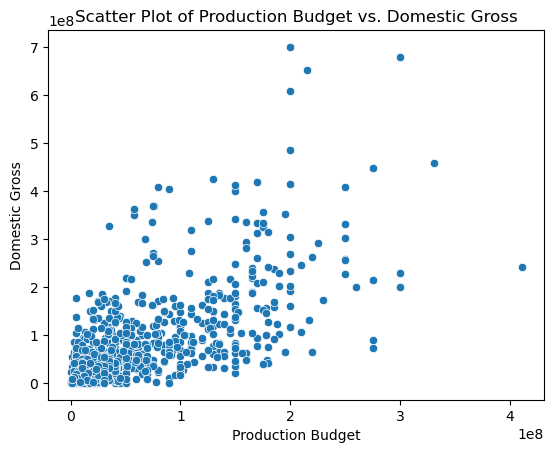

In [189]:
# Drop rows with missing values in either production budget or domestic gross
merged_df_clean = movies_select.dropna(subset=['production_budget', 'domestic_gross_x'])


# Calculate the correlation coefficient
correlation_coefficient, p_value = (merged_df_clean['production_budget'], merged_df_clean['domestic_gross_x'])
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Visualize the relationship using a scatter plot
sns.scatterplot(x='production_budget', y='domestic_gross_x', data=merged_df_clean)
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.title('Scatter Plot of Production Budget vs. Domestic Gross')
plt.show()



strong positive linear relationship between the production budget and the domestic gross.

strong positive linear relationship between the production budget and the domestic gross.

In [ ]:
# Drop rows with missing values in either production budget or domestic gross
merged_df_clean = movies_select.dropna(subset=['production_budget', 'worldwide_gross'])

# Calculate the correlation coefficient
correlation_coefficient, p_value = (merged_df_clean['production_budget'], merged_df_clean['worldwide_gross'])
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Visualize the relationship using a scatter plot
sns.scatterplot(x='production_budget', y='domestic_gross_x', data=merged_df_clean)
plt.xlabel('Production Budget')
plt.ylabel('worldwide_gross')
plt.title('Scatter Plot of Production Budget vs.worldwide_gross')
plt.show()



We check which genre was allocated the highest production budget.

In [ ]:

# Group the data by genre and calculate the sum of production budget for each genre
genre_production_budget = movies_select.groupby('genres')['production_budget'].sum().sort_values(ascending=False)

# Select the top 10 genres with the highest production costs
top_10_genres = genre_production_budget.head(10)

# Plot the top 10 genres with the highest production costs using a line graph
plt.figure(figsize=(12, 6))
top_10_genres.plot(kind='line', marker='o', color='skyblue')
plt.title('Top 10 Genres by Production Cost')
plt.xlabel('Genre')
plt.ylabel('Total Production Cost ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



We check which genre had the highest domestic gross.

Genre with the highest domestic gross: Action,Adventure,Sci-Fi
Genre with the highest worldwide gross: Action,Adventure,Sci-Fi


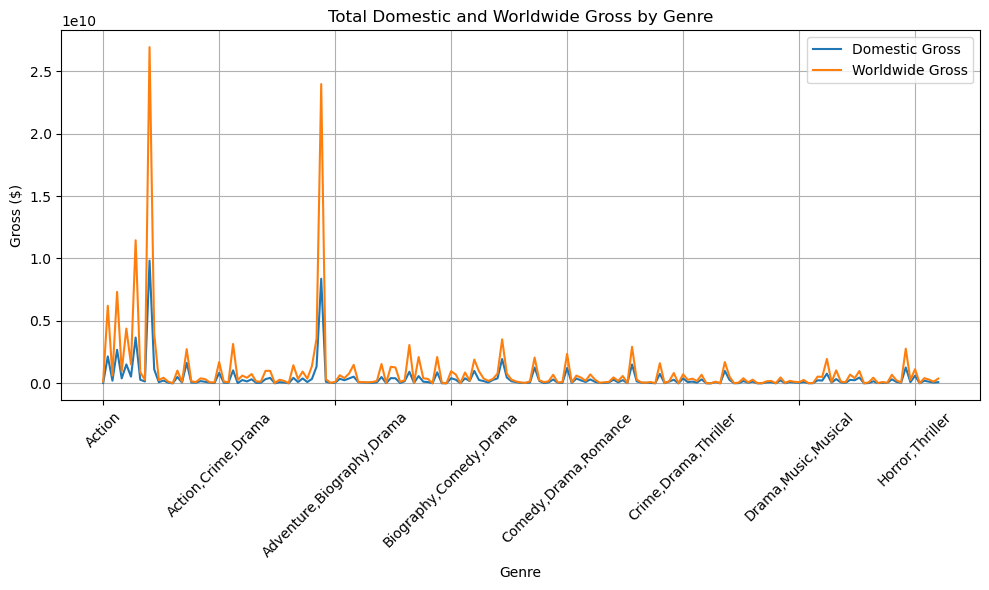

In [190]:
# Group the data by genre and calculate the sum of domestic gross and worldwide gross
genre_gross = movies_select.groupby('genres')[['domestic_gross_x', 'worldwide_gross']].sum()

# Find the genre with the highest domestic gross and worldwide gross
highest_domestic_gross_genre = genre_gross['domestic_gross_x'].idxmax()
highest_worldwide_gross_genre = genre_gross['worldwide_gross'].idxmax()

print("Genre with the highest domestic gross:", highest_domestic_gross_genre)
print("Genre with the highest worldwide gross:", highest_worldwide_gross_genre)

# Plot the results using a line graph
plt.figure(figsize=(10, 6))
genre_gross.plot(kind='line', ax=plt.gca())
plt.title('Total Domestic and Worldwide Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(['Domestic Gross', 'Worldwide Gross'])
plt.tight_layout()
plt.show()


In [191]:

# Assuming merged_df is your DataFrame containing 'studio' and 'production_budget' columns

# Group the data by studio and calculate the sum of production budget for each studio
studio_production_budget = movies_select.groupby('studio')['production_budget'].sum()

# Find the studio with the highest production budget
highest_production_budget_studio = studio_production_budget.idxmax()
highest_production_budget = studio_production_budget.max()

print("Studio with the highest production budget:", highest_production_budget_studio)
print("Production budget:", highest_production_budget)


Studio with the highest production budget: BV
Production budget: 8910800000.0


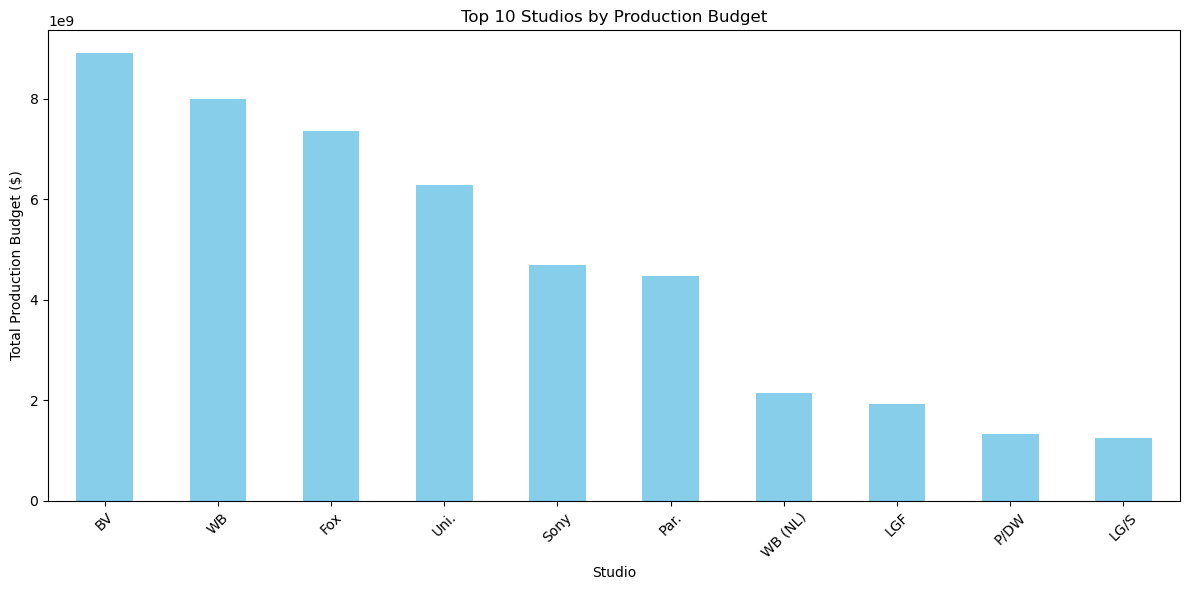

In [192]:

# Group the data by studio and calculate the sum of production budget for each studio
studio_production_budget = movies_select.groupby('studio')['production_budget'].sum().sort_values(ascending=False)

# Select the top 10 studios with the highest production budget
top_10_studios = studio_production_budget.head(10)

# Plot the top 10 studios with the highest production budget
plt.figure(figsize=(12, 6))
top_10_studios.plot(kind='bar', color='skyblue')
plt.title('Top 10 Studios by Production Budget')
plt.xlabel('Studio')
plt.ylabel('Total Production Budget ($)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()



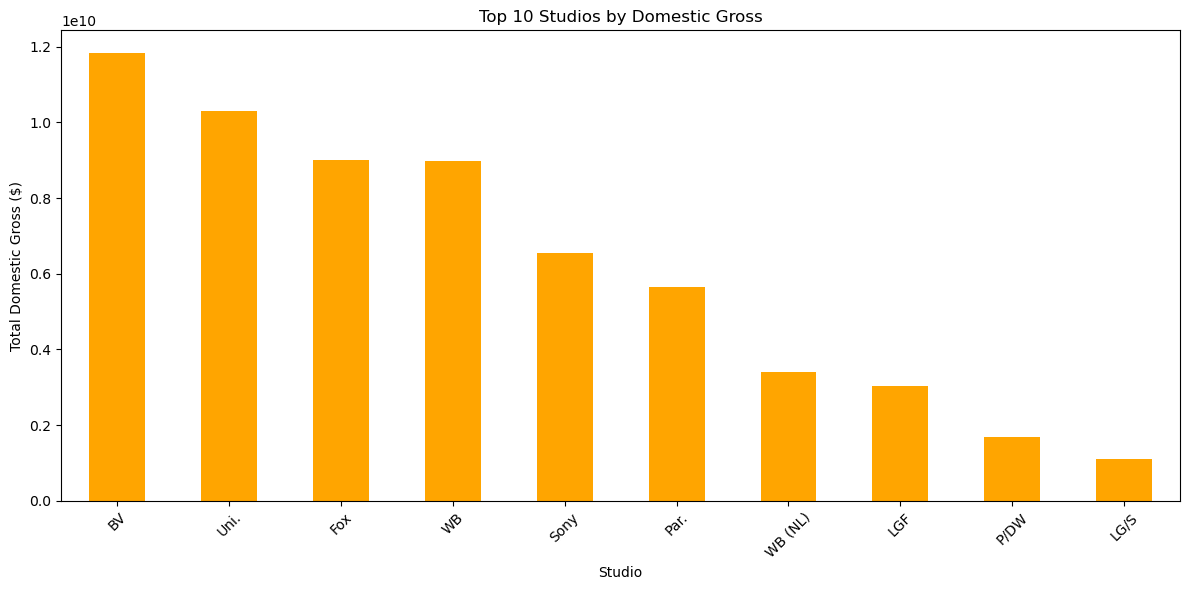

In [193]:
# Group the data by studio and calculate the sum of domestic gross for each studio
studio_domestic_gross = movies_select.groupby('studio')['domestic_gross_x'].sum().sort_values(ascending=False)

# Select the top 10 studios with the highest domestic gross
top_10_studios = studio_domestic_gross.head(10)

# Plot the top 10 studios with the highest domestic gross
plt.figure(figsize=(12, 6))
top_10_studios.plot(kind='bar', color='orange')
plt.title('Top 10 Studios by Domestic Gross')
plt.xlabel('Studio')
plt.ylabel('Total Domestic Gross ($)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


Studio with the highest worldwide gross: BV
Worldwide gross: 30717616647.0


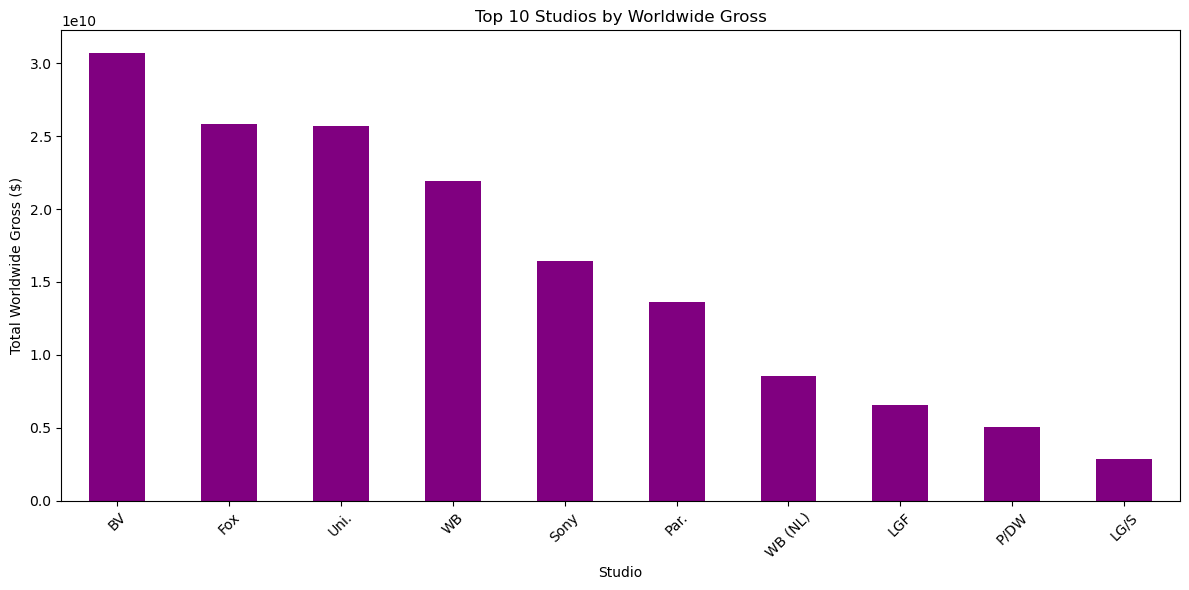

In [194]:
# Group the data by studio and calculate the sum of worldwide gross for each studio
studio_worldwide_gross = movies_select.groupby('studio')['worldwide_gross'].sum()

# Find the studio with the highest worldwide gross
highest_worldwide_gross_studio = studio_worldwide_gross.idxmax()
highest_worldwide_gross = studio_worldwide_gross.max()

print("Studio with the highest worldwide gross:", highest_worldwide_gross_studio)
print("Worldwide gross:", highest_worldwide_gross)

# Select the top 10 studios with the highest worldwide gross
top_10_studios = studio_worldwide_gross.nlargest(10)

# Plot the top 10 studios with the highest worldwide gross
plt.figure(figsize=(12, 6))
top_10_studios.plot(kind='bar', color='purple')
plt.title('Top 10 Studios by Worldwide Gross')
plt.xlabel('Studio')
plt.ylabel('Total Worldwide Gross ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_20684\117666280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_select['total_gross'] = movies_select['worldwide_gross'] + movies_select['domestic_gross_x']


Studio with the highest total gross: BV
Total gross: 42561416647.0


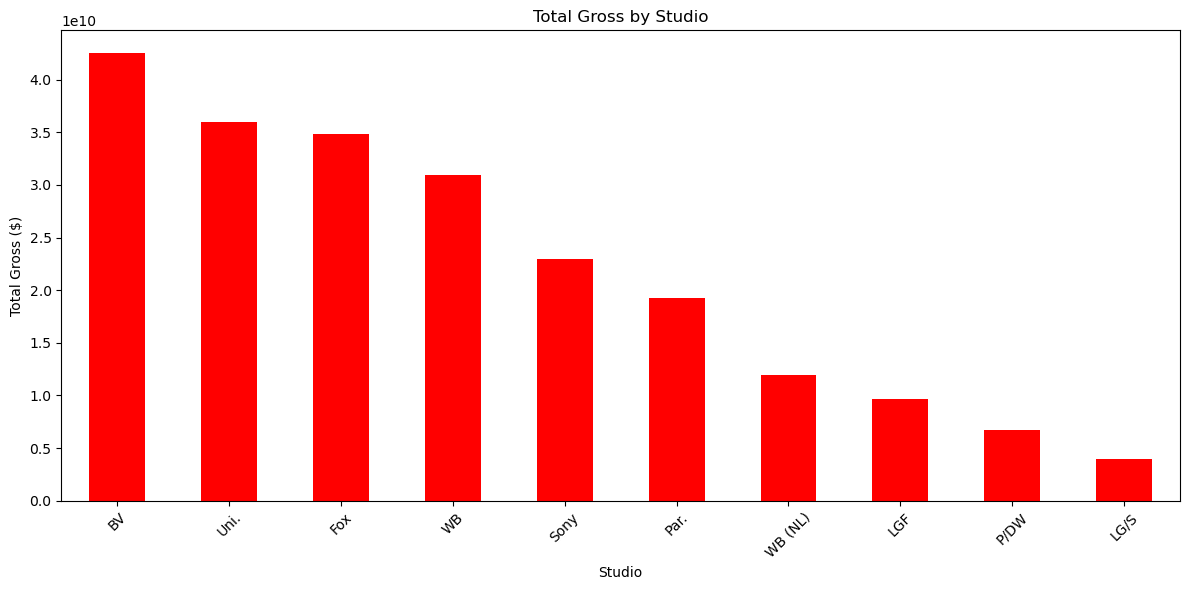

In [195]:
# Calculate the total gross (worldwide + domestic) for each studio
movies_select['total_gross'] = movies_select['worldwide_gross'] + movies_select['domestic_gross_x']

# Group the data by studio and calculate the sum of total gross for each studio
studio_total_gross = movies_select.groupby('studio')['total_gross'].sum().sort_values(ascending=False)

# Find the studio with the highest total gross
highest_gross_studio = studio_total_gross.idxmax()
highest_gross = studio_total_gross.max()

print("Studio with the highest total gross:", highest_gross_studio)
print("Total gross:", highest_gross)

# Plot the total gross for each studio
plt.figure(figsize=(12, 6))
studio_total_gross.head(10).plot(kind='bar', color='red')
plt.title('Total Gross by Studio')
plt.xlabel('Studio')
plt.ylabel('Total Gross ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Close analysis done